In [1]:
import import_ipynb
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
if __name__ == '__main__':
    from NeuralLayer import NeuralLayer
    from activation.ReluActivation import ReluActivation
    from activation.SigmoidActivation import SigmoidActivation
    from activation.LinearActivation import LinearActivation
    from activation.SoftmaxActivation import SoftmaxActivation
    from loss.L2Cost import L2Cost
    from loss.CrossEntropyCost import CrossEntropyCost
else:
    from .NeuralLayer import NeuralLayer
    from .activation.ReluActivation import ReluActivation
    from .activation.SigmoidActivation import SigmoidActivation
    from .activation.LinearActivation import LinearActivation
    from .activation.SoftmaxActivation import SoftmaxActivation
    from .loss.L2Cost import L2Cost
    from .loss.CrossEntropyCost import CrossEntropyCost

importing Jupyter notebook from NeuralLayer.ipynb
importing Jupyter notebook from /Users/macbook/Documents/Code/MICAS/backprop/NN_components/activation/ReluActivation.ipynb
importing Jupyter notebook from /Users/macbook/Documents/Code/MICAS/backprop/NN_components/activation/AbstractActivation.ipynb
importing Jupyter notebook from /Users/macbook/Documents/Code/MICAS/backprop/NN_components/activation/SigmoidActivation.ipynb
importing Jupyter notebook from /Users/macbook/Documents/Code/MICAS/backprop/NN_components/activation/LinearActivation.ipynb
importing Jupyter notebook from /Users/macbook/Documents/Code/MICAS/backprop/NN_components/activation/SoftmaxActivation.ipynb
importing Jupyter notebook from /Users/macbook/Documents/Code/MICAS/backprop/NN_components/loss/L2Cost.ipynb
importing Jupyter notebook from /Users/macbook/Documents/Code/MICAS/backprop/NN_components/loss/AbstractLoss.ipynb
importing Jupyter notebook from /Users/macbook/Documents/Code/MICAS/backprop/NN_components/loss/Cro

In [20]:
class NeuralNetwork:
    def __init__(self, data_size, cost_func=None):
        self.__layers = []
        self.data_size = data_size
        self.cost_func = cost_func
    
    
    def layer_summary(self):
        t = 0
        print('Total number of layers:',len(self.layers))
        for i, layer in enumerate(self.layers):
            print('#'*20)
            print('Layer {}:'.format(i+1))
            print('==>Shape:',layer.shape )
            print('==>Nb Params:',layer.shape[0]*layer.shape[1] )
            t+=layer.shape[0]*layer.shape[1]
        print('='*30)
        print('Total number of parameters:', t)
        print('='*30)
    
    @property
    def layers(self):
        return self.__layers
    
    @property
    def params(self):
        p = []
        for layer in self.layers:
            p.append(layer.params)
            print(f'Layer {layer.layer_index} shape {layer.shape}')
            print('Params:')
            print(layer.params)
        return p
    
    def add_layer(self, nb_neurons, learning_rate, activation):
        nb_input = self.data_size if len(self.__layers) == 0 else self.__layers[-1].dim_output
        layer = NeuralLayer(nb_input, nb_neurons, learning_rate, activation)
        self.__layers.append(layer)
        return layer
    
    def forward(self, X):
        Y_hat = X
        for layer in self.layers:
            Y_hat = layer.forward(Y_hat)
        return Y_hat 
    
    def backward(self, dY):
        dA = dY
        for layer in self.layers[::-1]:
            dA = layer.backward(dA)
    
    def update_params(self,optimizer='sgd'):
        for layer in self.layers:
            layer.update_params(optimizer=optimizer)
    
    def train(self, X, Y, optimizer ,epochs, batch_size= -1):
        if len(self.layers) > 0 :
            costs=[]
            if batch_size == -1:
                batch_size = X.shape[1]
            for epoch in tqdm(range(1, epochs+1)):
                for batch in range(0,X.shape[1],batch_size):
                    t = []
                    X_batch = X[:,batch:batch+batch_size]
                    Y_batch = Y[:,batch:batch+batch_size]
#                     print(X_batch.shape)
                    Y_hat = self.forward(X_batch)
                    cost, dY = self.cost_func.compute(Y_batch, Y_hat)
                    self.backward(dY)
                    self.update_params(optimizer)
                    t.append(cost)
                costs.append(np.mean(t))
#                 print(self.layers[-1]._NeuralLayer__cache[0][0])
            return costs
        

  0%|          | 1/3000 [00:00<05:01,  9.94it/s]

(1503, 5) (1503, 1)
X_train.shape (1202, 5)
Y_train.shape (1202, 1)
X_test.shape (301, 5)
Y_test.shape (301, 1)
0
Total number of layers: 8
####################
Layer 1:
==>Shape: (64, 6)
==>Nb Params: 384
####################
Layer 2:
==>Shape: (64, 65)
==>Nb Params: 4160
####################
Layer 3:
==>Shape: (64, 65)
==>Nb Params: 4160
####################
Layer 4:
==>Shape: (64, 65)
==>Nb Params: 4160
####################
Layer 5:
==>Shape: (64, 65)
==>Nb Params: 4160
####################
Layer 6:
==>Shape: (64, 65)
==>Nb Params: 4160
####################
Layer 7:
==>Shape: (32, 65)
==>Nb Params: 2080
####################
Layer 8:
==>Shape: (1, 33)
==>Nb Params: 33
Total number of parameters: 23297


100%|██████████| 3000/3000 [03:55<00:00, 12.73it/s]


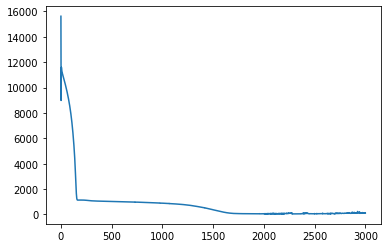

In [110]:
if __name__ == '__main__':
    # Setup:
#     data_dimension = 2 # size of the X = (x_1, x_2, ..., x_data_dimension)
#     data_size = 200 # data sample size
#     possible_outputs = [1, 0]
#     sigma_2 = 0.05


#     def generate_data_configuration(sigma_2):
#         return [ 
#         [[1,0], sigma_2*np.identity(data_dimension)],
#         [[-1,0], sigma_2*np.identity(data_dimension)],  
#         ] # For each class generate the corresponding data with it's respective mean and covariance matrix


#     data_configuration =  generate_data_configuration(sigma_2)
#     learning_rate = 0.9
#     nb_experiences = 50

#     def generate_random_data(data_size, data_configuration, possible_outputs, visualize = False) :
#         X_data_set = []
#         Y_data_set = []
#         for index, label in enumerate(possible_outputs) :

#             X = np.random.multivariate_normal(
#                 data_configuration[index][0],
#                 data_configuration[index][1],
#                 (data_size//len(possible_outputs)))

#             Y = label *np.ones((data_size//len(possible_outputs), 1))
#             X_data_set.append(X)
#             Y_data_set.append(Y)
#             if visualize :
#                 plt.plot(X.T[0],X.T[1],'x', label="Label Y = {}".format(label,))
#         if visualize :
#             plt.xlabel("$X_{1}$")
#             plt.ylabel("$X_{2}$")
#             plt.grid(True)
#             plt.legend()
#             plt.axis('equal'); 
#             plt.title('Synthetic data visualization')
#         X_data_set = np.concatenate(X_data_set, axis = 0)
#         Y_data_set = np.concatenate(Y_data_set, axis = 0)
#         indexes = np.random.permutation(data_size)
#         return X_data_set[indexes] , Y_data_set[indexes]

#     X_train, Y_train = generate_random_data(data_size, data_configuration, possible_outputs, visualize= True) 
#     print('X_train.shape',X_train.shape)
#     print('Y_train.shape',Y_train.shape)
#     data_size = 20
#     plt.show()
#     X_test, Y_test = generate_random_data(data_size, data_configuration, possible_outputs, visualize= True) 
#     plt.show()
#     print(X_test.shape)
#     def standardize(x):
#         """Standardize the original data set."""
#         return (x - x.mean(axis=0))/ x.std(axis=0)

#     x,y = datasets.load_boston(return_X_y=True)
#     print(x[:5])

    data = np.genfromtxt('../airfoil_self_noise.dat')
    x = data[:,:5]
    y = data[:,5:]
    y = np.reshape(y, (-1,1))
    print(x.shape, y.shape)
    X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = .2)
    
    print('X_train.shape',X_train.shape)
    print('Y_train.shape',Y_train.shape)
    print('X_test.shape',X_test.shape)
    print('Y_test.shape',Y_test.shape)
    
    learning_rate = 0.001
    nb_epoch = 3000
    batch_size = 64
    NeuralLayer.reset()
    print(NeuralLayer._NeuralLayer__nb_user_layer)
    nn = NeuralNetwork(X_train.shape[1], cost_func = L2Cost())
    nn.add_layer(nb_neurons=64, learning_rate=learning_rate, activation=ReluActivation())
    nn.add_layer(nb_neurons=64, learning_rate=learning_rate, activation=ReluActivation())
    nn.add_layer(nb_neurons=64, learning_rate=learning_rate, activation=ReluActivation())
    nn.add_layer(nb_neurons=64, learning_rate=learning_rate, activation=ReluActivation())
    nn.add_layer(nb_neurons=64, learning_rate=learning_rate, activation=ReluActivation())
    nn.add_layer(nb_neurons=64, learning_rate=learning_rate, activation=ReluActivation())
    nn.add_layer(nb_neurons=32, learning_rate=learning_rate, activation=ReluActivation())
    nn.add_layer(nb_neurons=Y_train.shape[1] , learning_rate=learning_rate, activation=LinearActivation())
    nn.layer_summary()
    costs = nn.train(X_train.T, Y_train.T,optimizer='adam', epochs= nb_epoch, batch_size= batch_size)
    plt.plot(costs)
    plt.show()
    y_hat = nn.forward(X_test.T)
    

In [111]:
for p,l in zip(y_hat.reshape((-1,)), Y_test.reshape((-1,))):
    print(f'for {l} , predicted {p}')
    

for 128.633 , predicted 133.88054184831645
for 108.625 , predicted 118.78764280620824
for 122.708 , predicted 123.8330451502616
for 132.357 , predicted 122.77583463503633
for 120.472 , predicted 118.6277112869408
for 118.113 , predicted 120.37513966561113
for 114.9 , predicted 114.85479301953515
for 126.642 , predicted 123.01300569302342
for 125.726 , predicted 133.88054184831645
for 127.947 , predicted 126.86564374937458
for 130.947 , predicted 140.69705727220355
for 126.632 , predicted 125.91288816423979
for 133.241 , predicted 126.1473904161105
for 112.169 , predicted 116.11461463419985
for 129.937 , predicted 133.88054184831645
for 129.134 , predicted 125.87127457662871
for 132.011 , predicted 122.78163518737321
for 113.086 , predicted 116.3439866599052
for 129.281 , predicted 133.88054184831645
for 128.723 , predicted 130.06582153921119
for 137.007 , predicted 121.4562672438061
for 116.603 , predicted 116.77776119111665
for 135.938 , predicted 121.8736087033842
for 126.066 , predi

In [112]:
print(f'Prediction statistics: mean = {y_hat.mean()} , std = {y_hat.std()}')
print(f'True values statistics mean = {Y_test.mean()} , std = {Y_test.std()}')


Prediction statistics: mean = 124.98343820305854 , std = 8.067348560695295
True values statistics mean = 124.65963122923587 , std = 6.773311502104394


In [113]:
np.mean((Y_test - y_hat)**2)

111.06471246058834